### **Weighing topics**:

In the last notebook, we have built a transformation of the data based on clustering. With this approach, we avoid to work with the semantic part of the log and we prefer to focus our analysis on the similarity between the logs based on their main topic. 

Before developing the main idea of this file, let's put an idea on record: is the position within a trace important? We are going to divided a trace in 3 arbitrary parts: 

![divided_trace.png](divided_trace.png)

- (1) **Initial Zone**: Composed of logs related to the stat of a process. It is expected that no error related logs will appear in this part.
- (2) **Mid Zone**: It is our zone of interest. Certain logs are expected to appear that warn that trace has problems. The idea is that the logs that satisfy this condition have their predominant topic close to (or the same as...) the logs that are directly associated with error.
- (3) **Critical Zone**: Logs appearing in this area are expected to have a direct relationship to the error in the trace. We can use this info to characterise our logs.

Finally, let's see some info related to our data.

#### Trace Size:

Let's take a look at the variability in trace lengths.



Loaded file: Corpus\Pionier_medium_11052023_v1.pkl
List with topics-per-log loaded from TopicsPerLog/TPL_7_27082023_(0).pkl


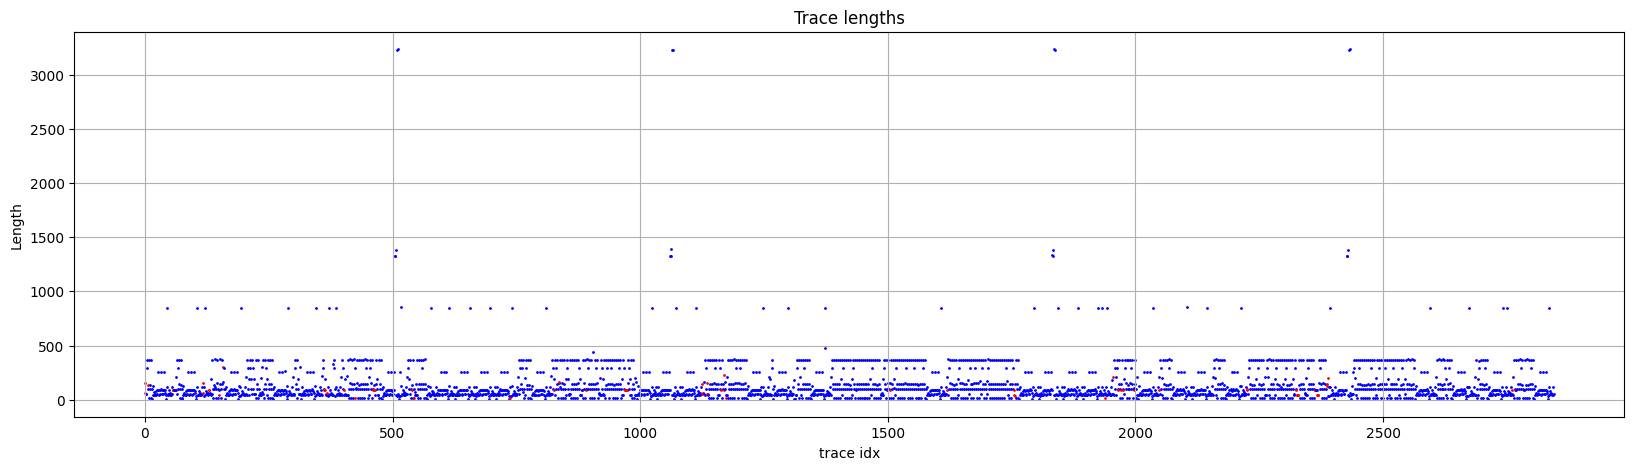

In [1]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt

num_topics=7
topics=  load_topic_list(num_topics=num_topics) 

#data
ds= TplPionier(config=config.ds_medium)
errors_idx=list(ds.index[ds.index['ERROR'] == True].index)

#calculate the trace size
lengths = [len(trace) for trace in topics]
plt.figure(figsize=(20, 5)) 

for i in range(len(topics)):
    color = 'red' if i in errors_idx else 'blue'
    plt.scatter(i, lengths[i], color=color, s=1) #

plt.title('Trace lengths')
plt.xlabel('trace idx')
plt.ylabel('Length')
plt.grid()
plt.show()

It can be noted that the vast majority of the traces do not exceed the length of 500. However, some of them can exceed a length of 3000. Regarding the lengths of the error traces (red points), the graph is not entirely conclusive, so let's look deeper...

#### Error Traces Size

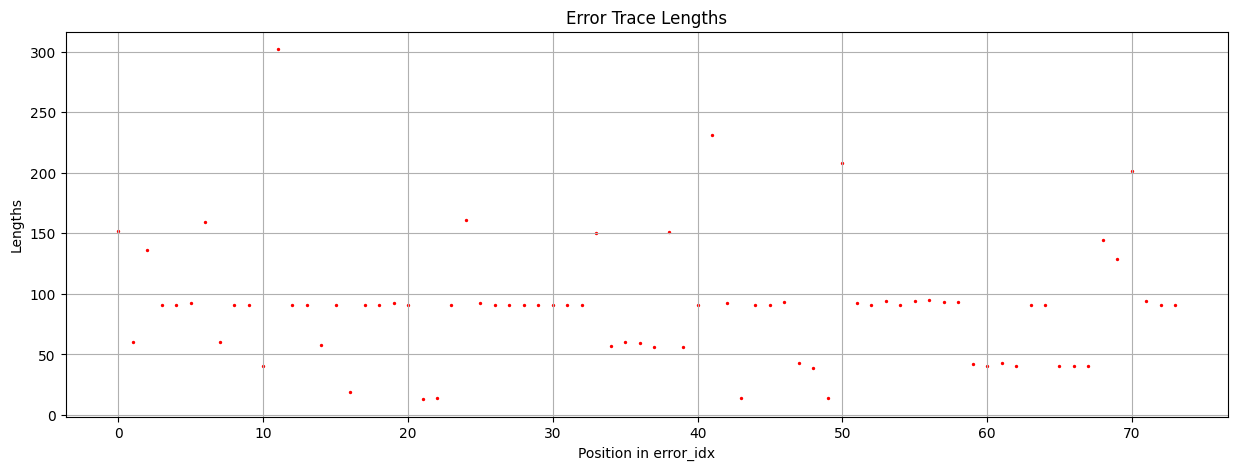

In [2]:
plt.figure(figsize=(15, 5))  
plt.scatter(range(len(errors_idx)), [lengths[j] for j in errors_idx], color='red', s=2)
plt.title('Error Trace Lengths')
plt.xlabel('Position in error_idx')
plt.ylabel('Lengths')
plt.grid()
plt.show()

It can be noted that most of the error traces do not exceed a length of 100, but some of them can exceed a length of 150 and even exceed 200.

#### Length frequencies:

Let's look at the frequencies of trace lengths:

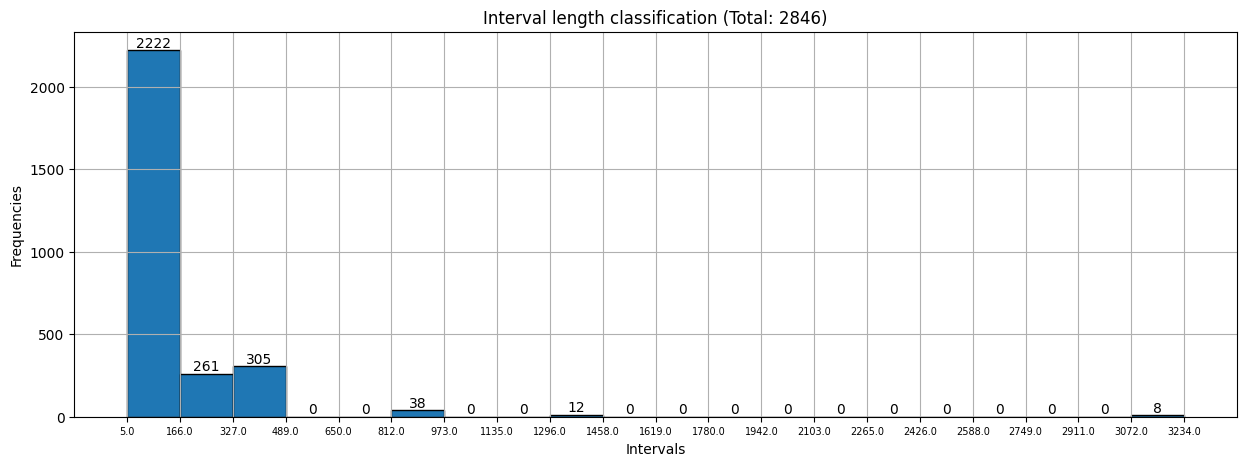

In [4]:
# We classify the lengths into 20 intervals:
histogram = np.histogram(lengths, bins=20)
frequencies, interval_limits = histogram

# plotting
plt.figure(figsize=(15, 5))
plt.bar(interval_limits[:-1], frequencies, width=np.diff(interval_limits), align='edge', edgecolor='black')

etiquetas = [f'{ np.trunc(interval_limits[i])}' for i in range(len(interval_limits) )]
plt.xticks(interval_limits, etiquetas, fontsize=7)

for i, freq in enumerate(frequencies):
    plt.text(interval_limits[i] + np.diff(interval_limits)[i] / 2, freq + 0.1, str(freq),
             ha='center', va='bottom')

# Personalizar el gráfico
plt.title(f'Interval length classification (Total: {len(lengths)})')
plt.xlabel('Intervals')
plt.ylabel('Frequencies')
plt.grid()

plt.show()

We can clearly see how the vast majority of our traces are in the range: 5-166. In addition, the rest are in the range: 327-489 (305) and 166-327 (261). Almost as an outlier, we have 8 traces in the range: 3072-3234. Let's look at the behavior of the traces with error.

#### Error Length Frequencies

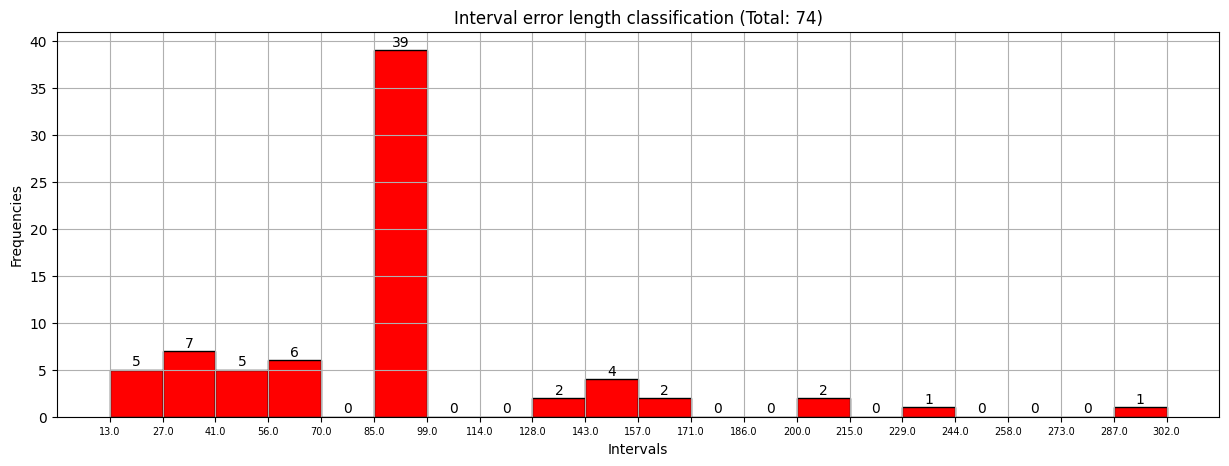

In [10]:
error_lengths=[lengths[j] for j in errors_idx]
histogram = np.histogram(error_lengths, bins=20)
frequencies, interval_limits = histogram 

plt.figure(figsize=(15, 5))
plt.bar(interval_limits[:-1], frequencies, width=np.diff(interval_limits), align='edge', edgecolor='black', color='red')

etiquetas = [f'{ np.trunc(interval_limits[i])}' for i in range(len(interval_limits) )]
plt.xticks(interval_limits, etiquetas, fontsize=7)

for i, freq in enumerate(frequencies):
    plt.text(interval_limits[i] + np.diff(interval_limits)[i] / 2, freq + 0.1, str(freq),
             ha='center', va='bottom')

# Personalizar el gráfico
plt.title(f'Interval error length classification (Total: {len(error_lengths)})')
plt.xlabel('Intervals')
plt.ylabel('Frequencies')
plt.grid()

plt.show()

For error traces, we have previously seen that the maximun recorded length is 300. However, more than half of the lengths are in the 85-99 range and, in general, the vast majority of the traces do not exceed length 100. This may be important if we would like to establish a break point within the trace, on which our model decides whether it is a traces with error or not.

#### Appearance of traces error:

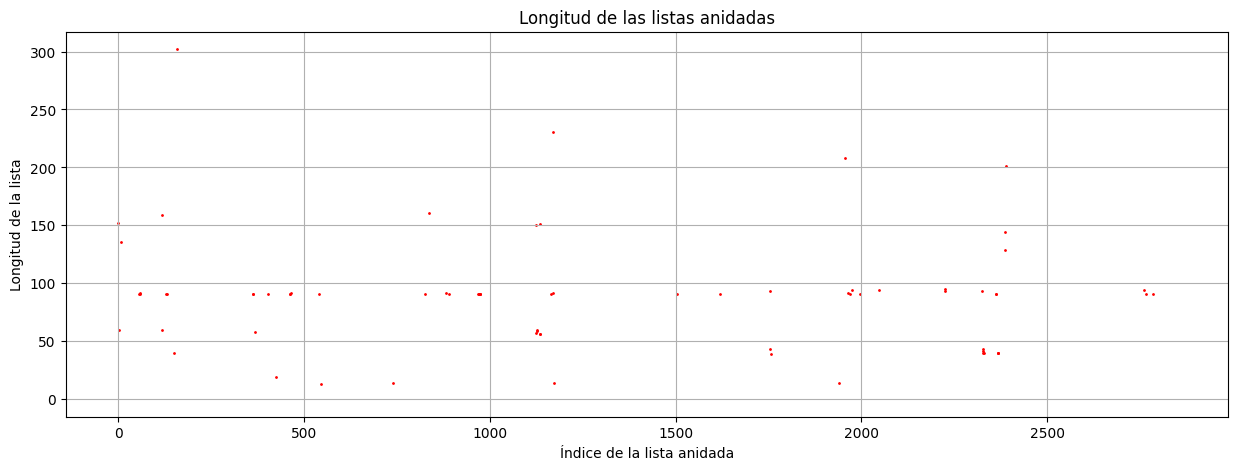

In [102]:

longitudes = [len(sublista) for sublista in topics]
nueva_lista = [numero if i in errors_idx else 0 for i, numero in enumerate(longitudes)]

plt.figure(figsize=(15, 5))  # Ajusta el tamaño según tus necesidades

# Crear un gráfico de puntos
for i in range(len(nueva_lista)):
    color = 'white' if nueva_lista[i] == 0 else 'red'
    plt.scatter(i, nueva_lista[i], color=color, s=1) #

plt.title('Longitud de las listas anidadas')
plt.xlabel('Índice de la lista anidada')
plt.ylabel('Longitud de la lista')
plt.grid()
plt.show()

#### Frequencies of the predominant topics:

Número 0: 272761 veces
Número 5: 55522 veces
Número 3: 17967 veces
Número 2: 1532 veces
Número 1: 48851 veces
Número 6: 12803 veces
Número 4: 4765 veces


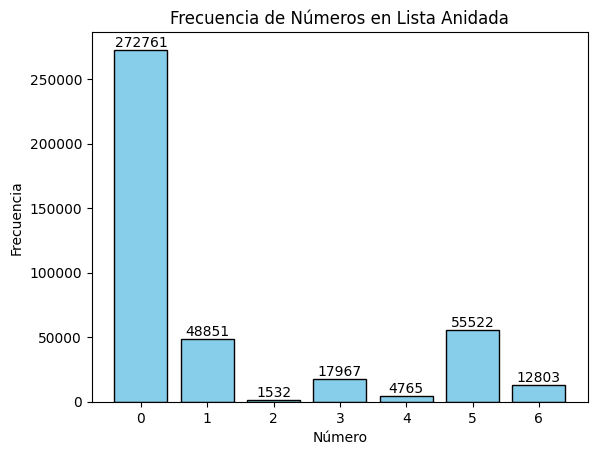

In [104]:
from collections import Counter

# Lista anidada con vectores de números enteros
lista_anidada = topics

# Utilizar Counter para contar la frecuencia de cada número
frecuencia_numeros = Counter(numero for sublista in lista_anidada for numero in sublista)

# Imprimir la frecuencia de cada número
for numero, frecuencia in frecuencia_numeros.items():
    print(f"Número {numero}: {frecuencia} veces")


# Obtener los números y frecuencias
numeros, frecuencias = zip(*frecuencia_numeros.items())

plt.bar(numeros, frecuencias, color='skyblue', edgecolor='black')

# Agregar etiquetas y título al gráfico
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Números en Lista Anidada')

# Agregar frecuencias arriba de cada barra
for numero, frecuencia in zip(numeros, frecuencias):
    plt.text(numero, frecuencia + 0.1, str(frecuencia), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Número 0: 1251 veces
Número 5: 4776 veces
Número 3: 226 veces
Número 2: 326 veces
Número 1: 48 veces
Número 6: 17 veces


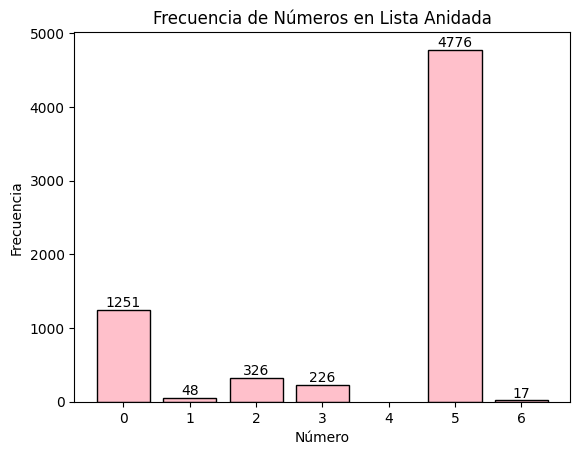

In [123]:
lista_anidada = [topics[j] for j in errors_idx]

# Utilizar Counter para contar la frecuencia de cada número
frecuencia_numeros = Counter(numero for sublista in lista_anidada for numero in sublista)

# Imprimir la frecuencia de cada número
for numero, frecuencia in frecuencia_numeros.items():
    print(f"Número {numero}: {frecuencia} veces")


# Obtener los números y frecuencias
numeros, frecuencias = zip(*frecuencia_numeros.items())

plt.bar(numeros, frecuencias, color='pink', edgecolor='black')

# Agregar etiquetas y título al gráfico
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Números en Lista Anidada')

# Agregar frecuencias arriba de cada barra
for numero, frecuencia in zip(numeros, frecuencias):
    plt.text(numero, frecuencia + 0.1, str(frecuencia), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Número 3: 86 veces
Número 0: 467 veces
Número 2: 291 veces
Número 5: 1113 veces
Número 1: 7 veces
Número 6: 1 veces


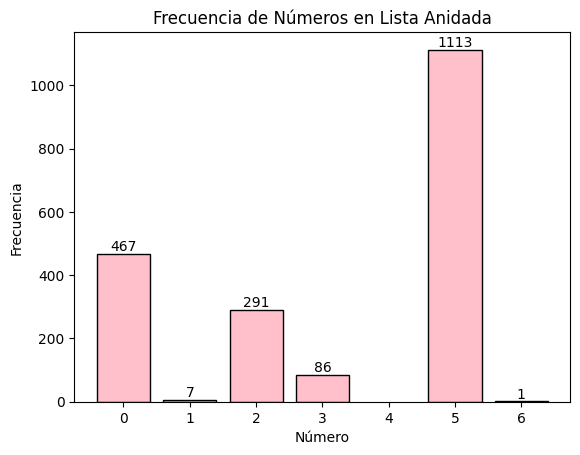

In [129]:
lista_anidada = [topics[j] for j in errors_idx]
a=[]

porcentaje_a_mostrar= 0.3
for i in range(len(errors_idx)):
    indice_final = int(len(lista_anidada[i]) * porcentaje_a_mostrar)
    porcentaje_del_vector = lista_anidada[i][-indice_final:]
    a.append(porcentaje_del_vector)

frecuencia_numeros = Counter(numero for sublista in a for numero in sublista)

# Imprimir la frecuencia de cada número
for numero, frecuencia in frecuencia_numeros.items():
    print(f"Número {numero}: {frecuencia} veces")


# Obtener los números y frecuencias
numeros, frecuencias = zip(*frecuencia_numeros.items())

plt.bar(numeros, frecuencias, color='pink', edgecolor='black')

# Agregar etiquetas y título al gráfico
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Números en Lista Anidada')

# Agregar frecuencias arriba de cada barra
for numero, frecuencia in zip(numeros, frecuencias):
    plt.text(numero, frecuencia + 0.1, str(frecuencia), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

### Adding weight to the topics

$$ [\text{IDF-based Event Weighting}] \; w_{idf} = \log ( \dfrac{N}{n_t})$$
where $N$ is the total number of log sequences and $n_t$ is the number of sequences where the topic $t$ appears

In [156]:
N= len(topics)
print(f"N: {len(topics)}, total number of log sequences-traces")

N: 2846, total number of log sequences-traces


In [164]:
import math

n_t = {i: 0 for i in range(num_topics)}
w_idf={i: 0 for i in range(num_topics)}

for i in range(len(topics)):
    uniques=set(topics[i])
    for num in uniques: 
        n_t[num] += 1

for idx_topic in n_t:
    w_idf[idx_topic] = math.log(N/n_t[idx_topic])
    
print("n_t: ", n_t)
print("w_idf: ",w_idf)

n_t:  {0: 2846, 1: 1834, 2: 226, 3: 1959, 4: 365, 5: 1909, 6: 1638}
w_idf:  {0: 0.0, 1: 0.43941512583338754, 2: 2.533134779377512, 3: 0.373480360705257, 4: 2.053772425067306, 5: 0.39933495492405013, 6: 0.5524385142367829}


In [170]:
list(n_t.values())

[2846, 1834, 226, 1959, 365, 1909, 1638]

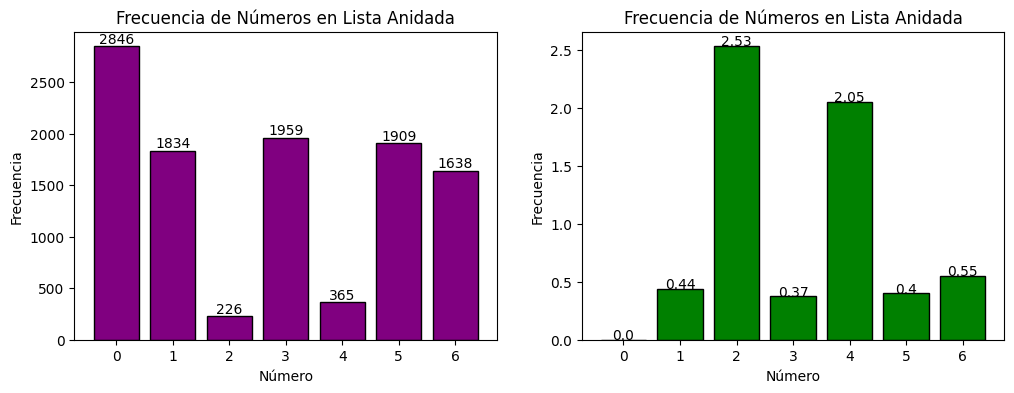

In [182]:
idx_topics=[idx for idx in list(n_t.keys())]
n_t_values=list(n_t.values())
w_idf_values=list(w_idf.values())


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(idx_topics, n_t_values, color='purple', edgecolor='black')
ax1.set_xlabel('Número')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Frecuencia de Números en Lista Anidada')
for numero, frecuencia in zip(idx_topics, n_t_values):
    ax1.text(numero, frecuencia + 0.1, str(frecuencia), ha='center', va='bottom')

ax2.bar(idx_topics, w_idf_values, color='green', edgecolor='black')
ax2.set_xlabel('Número')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Frecuencia de Números en Lista Anidada')

for numero, frecuencia in zip(idx_topics, w_idf_values):
    ax2.text(numero, frecuencia + 0.1, round(frecuencia,2), ha='center', va='top')

#plt.tight_layout()
plt.show()

In [185]:
# Crear la nueva lista anidada con valores reemplazados
import math

weighted_topics = [[ w_idf[num] for num in sublista] for sublista in topics]
print(weighted_topics[0])

[0.0, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933495492405013, 0.39933

![divided_trace.png](weighing_logs.png)

In [200]:
def weighing_topics(num_topics):
    
    topics=  load_topic_list(num_topics=num_topics) 

    #N
    N=len(topics)
    
    n_t = {i: 0 for i in range(num_topics)}
    w_idf={i: 0 for i in range(num_topics)}

    #n_t
    for i in range(len(topics)):
        uniques=set(topics[i])
        for num in uniques: 
            n_t[num] += 1
    #w_idf
    for idx_topic in n_t:
        w_idf[idx_topic] = math.log(N/n_t[idx_topic])

    weighed_topics = [[ w_idf[topic] for topic in trace] for trace in topics]

    return n_t, w_idf, weighed_topics
    
n_t, w_idf, weighted_topics = weighing_topics(10)

List with topics-per-log loaded from TopicsPerLog/TPL_10_13082023_(0).pkl


In [203]:
def plotting_widf(n_t, w_idf):

    idx_topics=[idx for idx in list(n_t.keys())]
    n_t_values=list(n_t.values())
    w_idf_values=list(w_idf.values())


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.bar(idx_topics, n_t_values, color='purple', edgecolor='black')
    ax1.set_xlabel('Número')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Frecuencia de Números en Lista Anidada')
    for numero, frecuencia in zip(idx_topics, n_t_values):
        ax1.text(numero, frecuencia + 0.1, str(frecuencia), ha='center', va='bottom')

    ax2.bar(idx_topics, w_idf_values, color='green', edgecolor='black')
    ax2.set_xlabel('Número')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Frecuencia de Números en Lista Anidada')

    for numero, frecuencia in zip(idx_topics, w_idf_values):
        ax2.text(numero, frecuencia + 0.1, round(frecuencia,2), ha='center', va='bottom')


    plt.show()

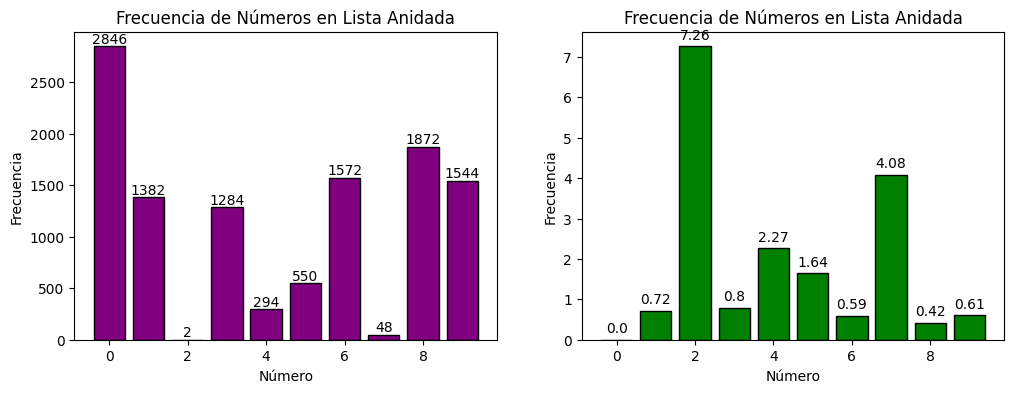

In [204]:
plotting_widf(n_t,w_idf)